# **Install & Download Folder Drive**

In [ ]:
!pip -q install gdown pytorch-tabnet

!rm -rf UAP-ML
!mkdir -p UAP-ML

!gdown --folder "https://drive.google.com/drive/folders/1yn0o_o6sLMnecB1MoQGOlAldd4ydh8pP?usp=drive_link" -O UAP-ML

!ls -lah UAP-ML
!ls -lah UAP-ML/models

Retrieving folder contents
Retrieving folder 14ePNpxKRfSvLcp-UHsA4PAlhM0uGDyDU models
Processing file 1OlthHP0a_PpV4btSzi9cAd6ix2zujD9X feature_cols.pkl
Processing file 175q_0HPi0uqk3EFbEAaVPid2zNrPukc7 label_encoder.pkl
Processing file 1O3c90JLv2e9RSpzEzh6P7cGhrCP6Xsot mlp_model.h5
Processing file 1c6Znyew5MljFE4fd1QvnEsRRIdA4h0fD preprocess.pkl
Processing file 1MBM4CVFygg4KuQNynWETR_8gjJ-zKamX top_genres.pkl
Processing file 1T_GLCDbLTzi3rTVut7RHT8S0rsNXuGyi mal_anime.csv
Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=1OlthHP0a_PpV4btSzi9cAd6ix2zujD9X
To: /content/UAP-ML/models/feature_cols.pkl
100% 295/295 [00:00<00:00, 1.43MB/s]
Downloading...
From: https://drive.google.com/uc?id=175q_0HPi0uqk3EFbEAaVPid2zNrPukc7
To: /content/UAP-ML/models/label_encoder.pkl
100% 555/555 [00:00<00:00, 2.76MB/s]
Downloading...
From: https://drive.google.com/uc?id=1O3c90JLv2e9RSpzEzh6P7cGhrCP6X

# **Import**

In [ ]:
import numpy as np
import pandas as pd
import joblib
import matplotlib.pyplot as plt

from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

from sklearn.decomposition import TruncatedSVD

# **Load Dataset & PKL (hasil Notebook 01)**

In [ ]:
BASE_DIR = Path("UAP-ML")
MODEL_DIR = BASE_DIR / "models"

df = pd.read_csv(BASE_DIR / "mal_anime.csv")

preprocess = joblib.load(MODEL_DIR / "preprocess.pkl")
top_genres = joblib.load(MODEL_DIR / "top_genres.pkl")

print("Dataset shape:", df.shape)
print("Top genres:", list(top_genres))
display(df.head())

Dataset shape: (19931, 25)
Top genres: ['Comedy', 'Action', 'Adventure', 'Drama', 'Hentai', 'Fantasy', 'Slice of Life', 'Sci-Fi']


,myanimelist_id,title,description,image,Type,Episodes,Status,Premiered,Released_Season,Released_Year,...,Demographic,Duration,Rating,Score,Ranked,Popularity,Members,Favorites,characters,source_url
0,1,Cowboy Bebop,"Crime is timeless. By the year 2071, humanity ...",https://cdn.myanimelist.net/images/anime/4/196...,TV,26,Finished Airing,Spring 1998,Spring,1998.0,...,NaN,24 min. per ep.,R - 17+ (violence & profanity),8.75,#48,#42,"2,008,019","87,916","[{""id"": 3, ""name"": ""Black, Jet"", ""url"": ""https...",https://myanimelist.net/anime/1/Cowboy_Bebop
1,5,Cowboy Bebop: Tengoku no Tobira,"Another day, another bounty—such is the life o...",https://cdn.myanimelist.net/images/anime/1439/...,Movie,1.0,Finished Airing,NaN,NaN,NaN,...,NaN,1 hr. 55 min.,R - 17+ (violence & profanity),8.38,#232,#649,"403,604","1,748","[{""id"": 3, ""name"": ""Black, Jet"", ""url"": ""https...",https://myanimelist.net/anime/5/Cowboy_Bebop__...
2,6,Trigun,"Vash the Stampede is the man with a $$60,000,0...",https://cdn.myanimelist.net/images/anime/1130/...,TV,26,Finished Airing,Spring 1998,Spring,1998.0,...,Shounen,24 min. per ep.,PG-13 - Teens 13 or older,8.22,#385,#265,"815,140","17,193","[{""id"": 713, ""name"": ""Stryfe, Meryl"", ""url"": ""...",https://myanimelist.net/anime/6/Trigun
3,7,Witch Hunter Robin,"Though hidden away from the general public, Wi...",https://cdn.myanimelist.net/images/anime/10/19...,TV,26.0,Finished Airing,Summer 2002,Summer,2002.0,...,NaN,25 min. per ep.,PG-13 - Teens 13 or older,7.23,#3344,#1979,"125,868",686,"[{""id"": 300, ""name"": ""Amon"", ""url"": ""https://m...",https://myanimelist.net/anime/7/Witch_Hunter_R...
4,8,Bouken Ou Beet,It is the dark century and the people are suff...,https://cdn.myanimelist.net/images/anime/7/215...,TV,52,Finished Airing,Fall 2004,Fall,2004.0,...,Shounen,23 min. per ep.,PG - Children,6.92,#4887,#5765,"16,456",18,"[{""id"": 9054, ""name"": ""Beet"", ""url"": ""https://...",https://myanimelist.net/anime/8/Bouken_Ou_Beet


# **Target + Filter kelas (konsisten)**

In [ ]:
df["main_genre"] = df["Genres"].astype(str).str.split(",").str[0].str.strip()
df = df[df["main_genre"].isin(top_genres)].copy()

print("Shape after filtering:", df.shape)
display(df["main_genre"].value_counts())

Shape after filtering: (16458, 26)


,count
main_genre,
Comedy,4961
Action,4291
Adventure,2201
Drama,1357
Hentai,1284
Fantasy,1049
Slice of Life,665
Sci-Fi,650


# **Fitur tabular + split**

In [ ]:
drop_cols_candidates = ["anime_id","mal_id","uid","title","name","synopsis","background","genre"]
drop_cols = [c for c in drop_cols_candidates if c in df.columns]

X = df.drop(columns=drop_cols + ["main_genre"], errors="ignore")
y = df["main_genre"].copy()

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train:", X_train.shape, "Test:", X_test.shape)

Train: (13166, 24) Test: (3292, 24)


# **Transform + SVD (anti crash, sama kayak MLP)**

In [ ]:
X_train_t = preprocess.transform(X_train)
X_test_t  = preprocess.transform(X_test)

# SVD -> dense kecil
svd = TruncatedSVD(n_components=300, random_state=42)
X_train_dense = svd.fit_transform(X_train_t)
X_test_dense  = svd.transform(X_test_t)

print("After SVD:", X_train_dense.shape, X_test_dense.shape)

After SVD: (13166, 300) (3292, 300)


# **Label encoding**

In [ ]:
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc  = le.transform(y_test)

print("Classes:", le.classes_)

Classes: ['Action' 'Adventure' 'Comedy' 'Drama' 'Fantasy' 'Hentai' 'Sci-Fi'
 'Slice of Life']


# **Train TabNet (Pretrained 1 ✅)**

In [ ]:
from pytorch_tabnet.tab_model import TabNetClassifier

tabnet = TabNetClassifier(
    n_d=32, n_a=32, n_steps=5,
    gamma=1.3,
    n_independent=2,
    n_shared=2,
    seed=42,
    verbose=1
)

tabnet.fit(
    X_train_dense, y_train_enc,
    eval_set=[(X_test_dense, y_test_enc)],
    eval_name=["val"],
    eval_metric=["accuracy"],
    max_epochs=80,
    patience=10,
    batch_size=1024,
    virtual_batch_size=128,
    num_workers=0,
    drop_last=False
)

/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 2.70589 | val_accuracy: 0.30012 |  0:00:05s
epoch 1  | loss: 2.00417 | val_accuracy: 0.35328 |  0:00:11s
epoch 2  | loss: 1.80348 | val_accuracy: 0.34508 |  0:00:16s
epoch 3  | loss: 1.72955 | val_accuracy: 0.37181 |  0:00:21s
epoch 4  | loss: 1.64762 | val_accuracy: 0.39976 |  0:00:27s
epoch 5  | loss: 1.59562 | val_accuracy: 0.41069 |  0:00:32s
epoch 6  | loss: 1.54796 | val_accuracy: 0.41434 |  0:00:38s
epoch 7  | loss: 1.52273 | val_accuracy: 0.41707 |  0:00:43s
epoch 8  | loss: 1.46116 | val_accuracy: 0.43104 |  0:00:48s
epoch 9  | loss: 1.38556 | val_accuracy: 0.4435  |  0:00:53s
epoch 10 | loss: 1.34513 | val_accuracy: 0.46112 |  0:00:58s
epoch 11 | loss: 1.31691 | val_accuracy: 0.44441 |  0:01:05s
epoch 12 | loss: 1.30796 | val_accuracy: 0.46446 |  0:01:10s
epoch 13 | loss: 1.26077 | val_accuracy: 0.49909 |  0:01:15s
epoch 14 | loss: 1.22389 | val_accuracy: 0.48724 |  0:01:21s
epoch 15 | loss: 1.18389 | val_accuracy: 0.49605 |  0:01:25s
epoch 16 | loss: 1.13752

/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


# **Plot Accuracy TabNet (mirip grafik)**

Metrics keys: ['loss', 'lr', 'val_accuracy'] 


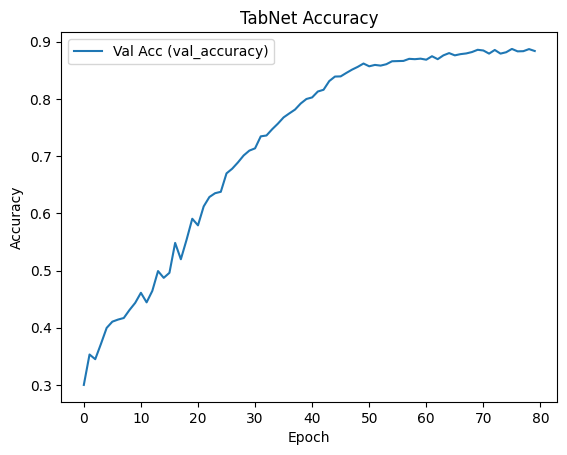

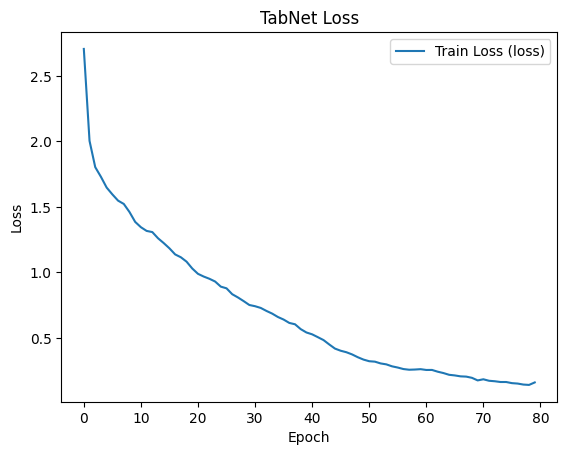

In [ ]:
import matplotlib.pyplot as plt

hist = tabnet.history

# ===== ambil metrics jadi bentuk dict: {metric_name: [values_per_epoch]} =====
metrics = {}

# Case 1: hist langsung dict
if isinstance(hist, dict):
    metrics = hist

# Case 2: hist punya .history (umum di beberapa versi pytorch-tabnet)
elif hasattr(hist, "history") and isinstance(hist.history, dict):
    metrics = hist.history

# Case 3: hist punya .epoch_metrics (list of dict per epoch)
elif hasattr(hist, "epoch_metrics"):
    for m in hist.epoch_metrics:
        if isinstance(m, dict):
            for k, v in m.items():
                metrics.setdefault(k, []).append(v)

# Kalau tetap kosong, tampilkan debug
if not metrics:
    print("Tidak menemukan metrics di tabnet.history.")
    print("Atribut history:", [a for a in dir(hist) if not a.startswith("_")])
else:
    print("Metrics keys:", list(metrics.keys())[:25], "..." if len(metrics.keys()) > 25 else "")

# helper pilih key pertama yang ada
def pick_key(candidates):
    for k in candidates:
        if k in metrics and len(metrics[k]) > 0:
            return k, metrics[k]
    return None, None

# ===== cari accuracy =====
train_acc_key, train_acc = pick_key(["accuracy", "train_accuracy", "acc"])
val_acc_key, val_acc = pick_key(["val_accuracy", "valid_accuracy", "val_acc"])

# ===== cari loss (bisa beda nama) =====
train_loss_key, train_loss = pick_key(["loss", "train_loss", "training_loss"])
val_loss_key, val_loss = pick_key(["val_logloss", "val_loss", "valid_loss", "val_cross_entropy", "val_ce", "logloss", "val_log_loss"])

# ===== plot accuracy =====
if (train_acc is not None) or (val_acc is not None):
    plt.figure()
    if train_acc is not None:
        plt.plot(train_acc, label=f"Train Acc ({train_acc_key})")
    if val_acc is not None:
        plt.plot(val_acc, label=f"Val Acc ({val_acc_key})")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.title("TabNet Accuracy")
    plt.legend()
    plt.show()
else:
    print("Tidak ada metrik accuracy yang bisa diplot.")

# ===== plot loss (kalau train loss gak ada, plot val loss sebagai proxy) =====
if (train_loss is not None) or (val_loss is not None):
    plt.figure()
    if train_loss is not None:
        plt.plot(train_loss, label=f"Train Loss ({train_loss_key})")
    if val_loss is not None:
        plt.plot(val_loss, label=f"Val Loss/Proxy ({val_loss_key})")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("TabNet Loss")
    plt.legend()
    plt.show()
else:
    print("Tidak ada metrik loss yang bisa diplot.")
    print("Tips: tambahkan eval_metric=['accuracy','logloss'] saat fit supaya val_logloss muncul.")

# **Evaluasi (Classification Report + Confusion Matrix) ✅ UAP**

               precision    recall  f1-score   support

       Action       0.84      0.89      0.86       858
    Adventure       0.86      0.78      0.82       440
       Comedy       0.90      0.93      0.91       992
        Drama       0.85      0.79      0.82       272
      Fantasy       0.92      0.86      0.89       210
       Hentai       1.00      1.00      1.00       257
       Sci-Fi       0.97      0.85      0.91       130
Slice of Life       0.97      0.95      0.96       133

     accuracy                           0.89      3292
    macro avg       0.91      0.88      0.90      3292
 weighted avg       0.89      0.89      0.89      3292



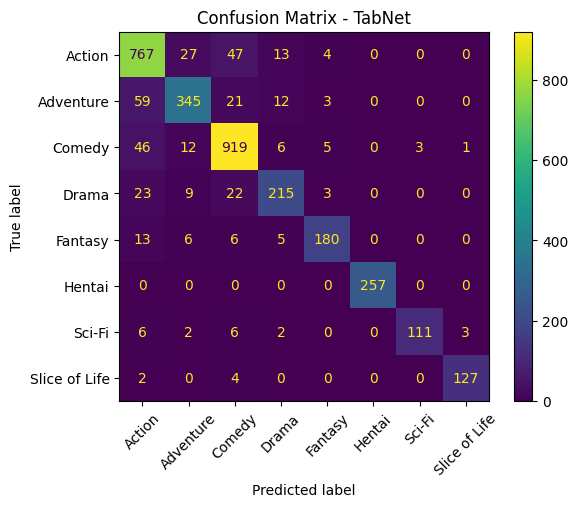

In [ ]:
y_pred = tabnet.predict(X_test_dense)

print(classification_report(y_test_enc, y_pred, target_names=le.classes_))

cm = confusion_matrix(y_test_enc, y_pred)
ConfusionMatrixDisplay(cm, display_labels=le.classes_).plot(xticks_rotation=45)
plt.title("Confusion Matrix - TabNet")
plt.show()

# **Save Model TabNet + encoder + SVD**

In [ ]:
MODEL_DIR.mkdir(exist_ok=True)

tabnet.save_model(str(MODEL_DIR / "tabnet_model"))
joblib.dump(le, MODEL_DIR / "label_encoder_tabnet.pkl")
joblib.dump(svd, MODEL_DIR / "svd_tabnet.pkl")

print("Saved:")
print("-", MODEL_DIR / "tabnet_model.zip")
print("-", MODEL_DIR / "label_encoder_tabnet.pkl")
print("-", MODEL_DIR / "svd_tabnet.pkl")

Successfully saved model at UAP-ML/models/tabnet_model.zip
Saved:
- UAP-ML/models/tabnet_model.zip
- UAP-ML/models/label_encoder_tabnet.pkl
- UAP-ML/models/svd_tabnet.pkl
